<center><strong><span style="font-family:AppleMyungjo, sans-serif;font-size: 2ipx;">CQF Exam 3(Module 4)</span></strong></center>
<center><strong>LANG TAO, WANG</strong></center>
<center><strong>January 2024</strong></center>

#  Introduction

Your objective is to produce a model to predict positive moves (up trend) using machine learning models as specified in the below section. Your proposed solution should be comprehensive with the detailed feature engineering and model architecture.

* Choose one ticker of your interest from the index, equity, ETF, crypto token, or commodity.

* Predict trend only, for a short-term return (example: daily, 6 hours). Limit prediction to binomial classification: the dependent variable is best labeled [0, 1]. Avoid using [-1, 1] as class labels.


* Analysis should be comprehensive with detailed feature engineering, data pre-processing, model building, and evaluation.


Devise your own approach on how to categorise extremely small near-zero returns (drop from training sample, group with positive/negative). The threshold will strongly depend on your ticker. Example: small positive returns below 0.25% can be labelled as negative.

# Questions

## Questions 1

**What is the cost function of Logistic Regression? Explain in Detail.**

* **Cost Function**

$$\begin{aligned}J(W) &= log\prod_{n=1}^{N} P(y^{[i]}|x^{[i]}) \\
&= -\frac{1}{N} \sum_{n=1}^{N} y^{[i]}log(\hat{y}^{[i]}) + (1-y^{[i]})log(1-\hat{y}^{[i]}) \\
&= -\frac{1}{N} \sum_{n=1}^{N} y^{[i]}log(f(x^{[i]};W)) + (1-y^{[i]})log(1-f(x^{[i]};W)) \\
&= -\frac{1}{N} \sum_{n=1}^{N} y^{[i]}log(\hat{p}^{[i]}) + (1-y^{[i]})log(1-\hat{p}^{[i]}) \\
&= \frac{1}{N} \sum_{n=1}^{N} \mathbb{H}_{ce}(y^{[i]},\hat{p}^{[i]})
\end{aligned}$$

where $\hat{p}^{[i]}$ is the probability of class 1, and $\mathbb{H}_{ce}(y^{[i]},\hat{p}^{[i]})$ is the *binary cross entropy* defined by 

$$\mathbb{H}_{ce}(p,q) = -[plog(q) + (1-p)log(1-q)]$$

* **Maximum likelihood estimation**

Binary logistic regression corresponds to the following model

$$\hat{y}=P(Y=1|X=x)=\sigma(\mathbf{w\cdot x}) \qquad where\quad \sigma(z)=\frac{1}{1+e^{-z}}$$

$$P(y|x)=\begin{cases}  
 \hat{y} & \text{if}\quad y=1 \\
 1-\hat{y}& \text{if} \quad y=0 
 \end{cases}$$

then Y is a Bernoulli random variable Y~Ber(p), where $ p= \sigma{(\mathbf{w \cdot x})}$

$$ \begin{aligned}\therefore \quad
& P(Y=y|X=x)=\sigma(\mathbf{w \cdot x})^y[1-\sigma(\mathbf{w \cdot x})]^{(1-y)}  \\
& P(y|x)= \hat{y}^y(1-\hat{y})^{(1-y)} \\
& log(P(y|x))= ylog(\hat{y})+(1-y)log(1-\hat{y}) 
\end{aligned}$$

The sigmoid gives the probability that the class label is y = 1. If the loss for misclassifying each class is the same, then the optimal decision rule is to predict y = 1 iff class 1 is more likely than class 0, Thus

$$f(x)= \mathbb{I}(P(y=1|x)>P(y=0|x))=\mathbb{I}(log\frac{P(y=1|x)}{P(y=0|x)} > 0)=\mathbb{I}(a>0)$$

where $ a = \sigma(\mathbf{w \cdot x})$, we assume the bias term b is absorbed into the weight vector $\mathbf{w}$.

For estimate the parameter of a logistic regression model using maximum likelihood estimation. The negative log likelihood (scaled by the dataset size N) is given by the following 

$$ \begin{aligned} NLL(\mathbf{w}) 
& = -\frac{1}{N}log\prod_{n=1}^{N}Ber(y_n|\mu_n) \\
& = -\frac{1}{N}\sum_{n=1}^{N}log[\mu_n^{y_n} \times (1-\mu_n)^{(1-y_n)}]\\
& = -\frac{1}{N}\sum_{n=1}^{N} [y_nlog(\mu_n)+(1-y_n)log(1-\mu_n)] \\
&= \frac{1}{N} \sum_{n=1}^{N} \mathbb{H}_{ce}(y_n,\mu_n)
\end{aligned}$$

where $\mu_n=\sigma(\mathbf{w \cdot x}_n)$ is the probability of class 1. Maximising the log of probability is minimising the loss, so cost function is equivalent to the MLE. This means that we can use any gradient-based optimization algorithm to solve this, optimization problem.

## Questions 2

**What are voting classifiers in ensemble learning?**

Ensemble models are machine learning models that use more than one predictor to arrive at a prediction. A group of predictors form an ensemble.

For voting classifier in ensemble learning, it take a majority vote of the outputs(This is sometimes called a **committee method**). Suppose each base model is a binary classifier with accuracy of $\theta$, and suppose class 1 is the correct class. Let $Y_m \in [0,1]$ be the prediction for the m'th model, and let $S=\begin{matrix}\sum_{m=1}^{M}Y_m\end{matrix}$ be the number of votes for class 1. We difine the final predictor to be majority vote, i.e., class 1 if S > M/2 and class 0 otherwise. The probability that the ensemble will pick class 1 is 

$$p=Pr(S > M/2)= 1-B(M/2, M, \theta)$$

where $B(x, M, \theta)=\sum_{i=0}^{x}\binom{n}{i}\theta^{i}(1-\theta)^{(n-i)}$ is the cdf of the binomial distribution with parameter M and $\theta$ evaluated at x. For $\theta=0.51$ and M=1000, we get p=0.73 and with M=10,000 we get p=0.97.

In contrast to majority voting (hard voting), soft voting returns the class label as argmax of the sum of predicted probabilities.

Specific weights can be assigned to each classifier via the weights parameter. When weights are provided, the predicted class probabilities for each classifier are collected, multiplied by the classifier weight, and averaged. The final class label is then derived from the class label with the highest average probability.

## Questions 3

Follow the 7-steps to model building for your selected ticker,

(a) produce a model to predict positive moves (up trend) using Support Vector Machine (SVM) model.

(b) tune hyperparameters for the estimator and present the best model.

(c) investigate the prediction quality using area under ROC curve, confusion matrix and classifica- tion report.

### 3.1. Support Vector Machines

Support Vector Machines(SVM) are a supervised-learing algorithm that is commonly used within classification problems. We have classified data represented by vectors of features. This method divides data according to which side of a hyperplane in feature space
each point lies. In other words, finding an optimal line or hyperplane that maximizes the distance between each class in an N-dimensional space.

The SVM algorithm is widely used in machine learning as it can handle both linear and nonlinear classification tasks. However, we might have data that is not linearly separable but which nonetheless falls neatly into two groups, just not groups that can be divided by a hyperplane. Kernel functions are used to transform the data higher dimension feature space to enable linear separation. This application of kernel functions can be known as the “kernel trick,” and the choice of kernel function, such as linear kernels, polynomial kernels, radial basis function (RBF) kernels, or sigmoid kernels, depends on data characteristics and the specific use case.

**SVC**

Given training vectors $x_i \in \mathbb{R}^p$ , i=1,…, n, in two classes, and a vector $y \in [1,-1]$, our goal is to find $w \in \mathbb{R}^p$ and $b\in \mathbb{R}$ such that the prediction given by $\mathbf{sign}(w^T\Phi(x)+b)$
is correct for most samples.



SVC solves the following primal problem:

$$\begin{aligned} &\qquad \qquad \qquad\mathop{min}\limits_{w,b,\zeta} \frac{1}{2} w^T w + C\sum_{i=1}^{n}\zeta_i \\
&subject \quad to \quad y_i(w^T\phi(x_i)+b) \geq 1-\zeta_i, \\
& \qquad \qquad \qquad \zeta_i\geq 0, i=1,...,n
\end{aligned}$$

The dual problem to the primal is

$$\begin{aligned} &\qquad \qquad \qquad\mathop{min}\limits_{\alpha} \frac{1}{2} \alpha^T \boldsymbol{Q} \alpha - e^T\alpha\\
&subject \quad to \quad y^T\alpha =0\\
& \qquad \qquad \qquad 0 \leq \alpha_i \leq C, i=1,...,n
\end{aligned}$$

where e is the vector of all ones, and $\boldsymbol{Q}$ is an n by n positive semidefinite matrix, $\boldsymbol{Q}_{ij} \equiv y_iy_jK(x_i,x_j)$, where $K(x_i,x_j)=\phi(x_i)^T\phi(x_j)$ is the kernel. The terms $\alpha_i$ are called the dual coefficients, and they are upper-bounded by C. This dual representation highlights the fact that training vectors are implicitly mapped into a higher (maybe infinite) dimensional space by the function $\phi$.


Once the optimization problem is solved, the output of decision function for a given sample $x$ becomes:

$$\sum_{i\in SV}y_i\alpha_i K(x_i,x)+b,$$

and the predicted class correspond to its sign.

**RBF**

$$\exp(-\gamma\left\|x-x'\right\|)^2$$

where $\gamma$ is specified by parameter gamma, must be greater than 0.

### 3.2 Model Detail

In this section, we will use SVC(C-Support Vector Classification) from sklearn library to predict positive moves and the choice of kernel function is the radial basis function(RBF) kernels.

#### Import Librarise

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
# Base libraries
import pandas as pd
import numpy as np
from functools import partial
# Use Optuna for Tuning
import optuna
import cufflinks as cf
cf.set_config_file(offline=True, dimensions=((1000,600)))
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(rc={'figure.figsize': (20, 8)})
# Proprecessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import (
                                     train_test_split,
                                     TimeSeriesSplit,
                                     GridSearchCV,
                                     cross_val_score
                                     )
# Classifier
from sklearn.svm import SVC
# Metrics
from sklearn.metrics import (precision_recall_curve,
                             roc_curve,
                             RocCurveDisplay,
                             ConfusionMatrixDisplay,
                             )

from sklearn.metrics import (accuracy_score,
                             f1_score,
                             recall_score,
                             precision_score,
                             roc_auc_score,
                             auc
                             )

from sklearn.metrics import (classification_report,
                             confusion_matrix
                             )

#### 3.2.1 Load data

We will predict positive moves for NASDAQ 100 Index, the interest rate of bond 10 years form a apart of feature sets.

In [2]:
# Reading local data for NASDAQ 100
df = pd.read_csv('NDX.csv', index_col='Date', parse_dates=True, dayfirst=True)
# Reading local data for Interest Rate 10 Year Bond
df1 = pd.read_csv('TNX.csv', index_col='Date', parse_dates=True, dayfirst=True)
df1.dropna(inplace=True)
df1.head()

Open   High    Low  Close  Adj Close  Volume
Date                                                     
2014-01-02  3.028  3.034  2.978  2.985      2.985     0.0
2014-01-03  2.998  3.012  2.971  2.995      2.995     0.0
2014-01-06  2.976  2.984  2.946  2.961      2.961     0.0
2014-01-07  2.956  2.965  2.937  2.937      2.937     0.0
2014-01-08  2.984  3.010  2.976  2.993      2.993     0.0

In [3]:
# Get info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2612 entries, 2014-01-02 to 2024-05-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2612 non-null   float64
 1   High       2612 non-null   float64
 2   Low        2612 non-null   float64
 3   Close      2612 non-null   float64
 4   Adj Close  2612 non-null   float64
 5   Volume     2612 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 142.8+ KB


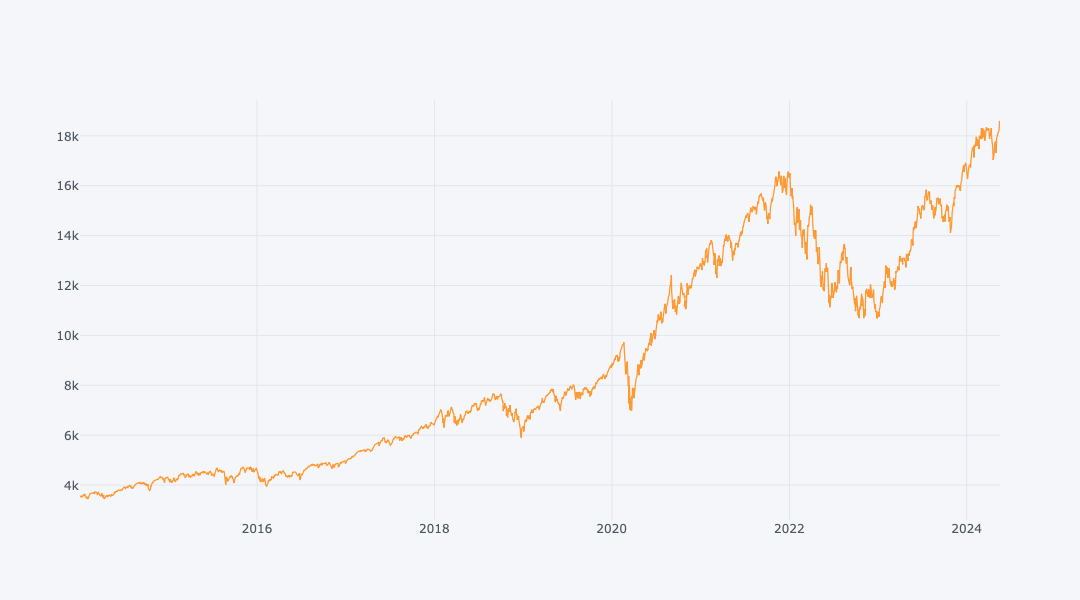

In [4]:
# Plotting  NDX data
df[['Adj Close']].iplot()

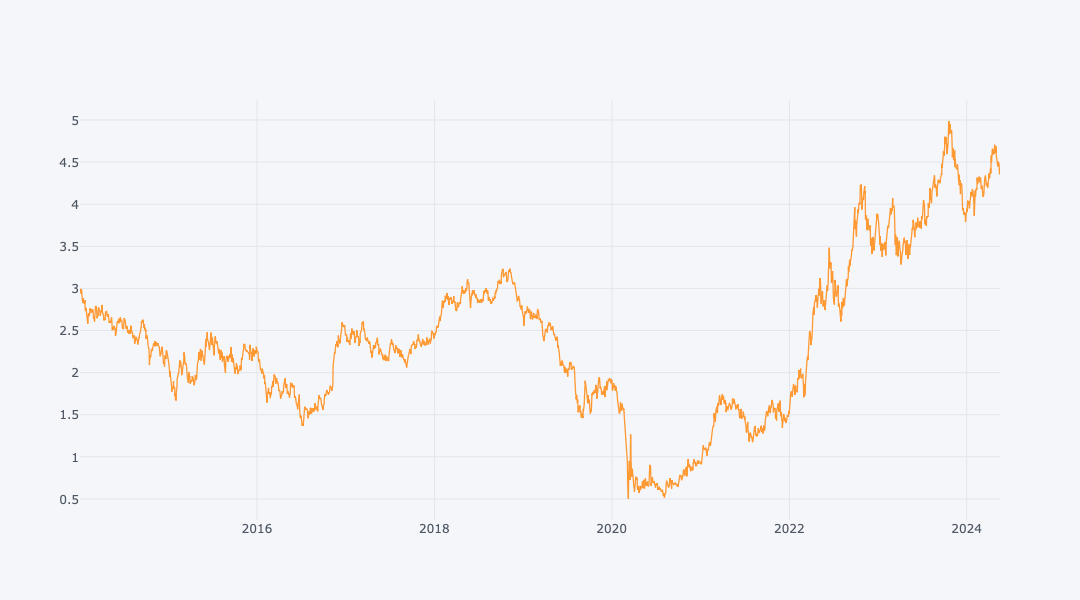

In [5]:
# Plotting interest rate data
df1[['Adj Close']].iplot()

 #### 3.2.2 EDA analysis 

In [6]:
# Descriptive statistics
df.describe()

Open          High           Low         Close     Adj Close  \
count   2612.000000   2612.000000   2612.000000   2612.000000   2612.000000   
mean    8828.402472   8891.416005   8761.482454   8830.850046   8830.850046   
std     4315.407932   4349.085545   4279.038229   4316.158712   4316.158712   
min     3453.239990   3469.350098   3414.110107   3440.500000   3440.500000   
25%     4729.122559   4751.489990   4694.447510   4722.490112   4722.490112   
50%     7425.380127   7487.020019   7384.275147   7432.494873   7432.494873   
75%    12709.555176  12812.369873  12601.422363  12717.637207  12717.637207   
max    18589.980469  18669.500000  18553.300781  18596.650391  18596.650391   

             Volume  
count  2.612000e+03  
mean   3.193406e+09  
std    1.587894e+09  
min    2.441200e+08  
25%    1.906705e+09  
50%    2.343825e+09  
75%    4.511035e+09  
max    1.193260e+10

#### 3.2.3 Cleaning

Data is already cleaned. No further processing or imputation required.

**Check for missing value**

In [7]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
df1.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

#### 3.2.4 Feature Engineering

Features or Predictors are also known as an independent variable which are used to determine the value of the target variable. We will derive a features set from the original dataset.       

$$\mathbf {Table 1: Features List}$$

|Feature|Formula|Description|
|---|---|---|
|O-C, H-L|Open - Close, High - Low|intraday price range|
|Sign|sign[$rt=ln \frac{P_t}{P_{t−1}}$] |sign of return or momentum lagged returns|
|Rate Sign|sign[$rate change=ln\frac{r_t}{r_{t-1}}$]|sign of rate change lagged|
|Past Returns|$r_{t−1}, r_{t−2}, ...$ |lagged returns|
|Past Change|$ratechg_{t-1}, ...$| lagged rate change|
|Momentum|$P_t − P_{t−k}$|price change over k period|
|Moving Average|$SMA_i =\frac{1}{n} \sum_{i=0}^{n-1}P_{t−i}$|simple moving average|
|Exponential MA|$EMA_i = EMA_{t−1} + α[P_t − EMA_{t−1}]$|recursive, $α = 2/(N_{obs} + 1)$|
|STD for returns and rate change|$\sigma$|Standard Deviation for returns and rate change|

**Features Specification**

In [9]:
# Create Feature 
df['OC'] = df['Open'] - df['Close']
df['HL'] = df['High'] - df['Low']
df['Return'] = np.log(df[['Adj Close']]).diff()
df['Rate_CHG'] = np.log(df1['Adj Close']).diff()
df['Sign'] = np.where(df['Return']>0.0025, 1, -1)
df['Rate_Sign'] = np.where(df['Rate_CHG']>0.0025, 1, -1)


# Calcualte EMA
def EMA(data, window):
    # Multiplier alpha
    multiplier = 2 / (window + 1)
    
    # Calculate the initial SMA as the mean of the first window periods
    sma = data.rolling(window).mean()
    
    # Initialize the list with the initial SMA
    ema_values = [sma.iloc[window-1]] 
    
    # Calculate EMA for each subsequent period
    for i in range(window, len(data)):
        ema = (data.iloc[i] - ema_values[-1]) * multiplier + ema_values[-1]
        ema_values.append(ema)
    
    return pd.Series(ema_values, index=data.index[window-1:])

for i in [5, 10, 22]:
    #df['Ret_' + str(i) + 'Days'] = df['Return'].rolling(i).sum()
    df['STD_' + str(i) + 'Days'] = df['Return'].rolling(i).std()
    df['Rate_STD_' + str(i) + 'Days'] = df['Rate_CHG'].rolling(i).std()
    df['Sign_' + str(i) + 'Days'] = np.where(df['Return'].rolling(i).sum()>0.0025, 1, -1) 
    df['Rate_Sign_' + str(i) + 'Days'] = np.where(df['Rate_CHG'].rolling(i).sum()>0.0025, 1, -1) 
    df['Momentum_' + str(i) + 'Days'] = df['Adj Close'] - df['Adj Close'].shift(i)
    df['VCHG_' + str(i) + 'Days'] = df['Volume'].pct_change(i)
    df['EMA_' + str(i) + 'Days'] = EMA(df['Adj Close'], i)
    df['SMA_' + str(i) + 'Days'] = df['Adj Close'].rolling(i).mean()

df.dropna(inplace=True)

features = df.drop(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Return'], axis=1)
features.head()

OC         HL  Rate_CHG  Sign  Rate_Sign  STD_5Days  \
Date                                                                     
2014-02-04 -10.070068  31.550049  0.016523     1          1   0.016338   
2014-02-05   2.140137  50.470215  0.016254    -1          1   0.015709   
2014-02-06 -31.770020  37.100098  0.013038     1          1   0.013970   
2014-02-07 -39.579834  54.309815 -0.010043     1         -1   0.016567   
2014-02-10 -23.520019  25.060059  0.001121     1         -1   0.008409   

            Rate_STD_5Days  Sign_5Days  Rate_Sign_5Days  Momentum_5Days  ...  \
Date                                                                     ...   
2014-02-04        0.021078          -1               -1      -35.520020  ...   
2014-02-05        0.021015          -1               -1      -12.920166  ...   
2014-02-06        0.021743          -1                1      -34.809814  ...   
2014-02-07        0.021827           1                1       39.989990  ...   
2014-02-10        0.011588           1                1      141.610107  ...   

             EMA_10Days   SMA_10Days  STD_22Days  Rate_STD_22Days  \
Date                                                                
2014-02-04  3510.458101  3523.054981    0.010870         0.016103   
2014-02-05  3500.356611  3505.772974    0.010819         0.016679   
2014-02-06  3499.855427  3494.156982    0.011171         0.017061   
2014-02-07  3511.138060  3496.199976    0.011710         0.017087   
2014-02-10  3524.042069  3503.508984    0.011759         0.016345   

            Sign_22Days  Rate_Sign_22Days  Momentum_22Days  VCHG_22Days  \
Date                                                                      
2014-02-04           -1                -1       -93.370117     0.249905   
2014-02-05           -1                -1       -83.830078     0.300381   
2014-02-06           -1                -1       -29.359863    -0.152710   
2014-02-07           -1                -1         4.059814    -0.097607   
2014-02-10            1                -1        14.570068    -0.227377   

             EMA_22Days   SMA_22Days  
Date                                  
2014-02-04  3545.392869  3548.310003  
2014-02-05  3537.523915  3544.499545  
2014-02-06  3534.052279  3543.165006  
2014-02-07  3536.474682  3543.349543  
2014-02-10  3540.442980  3544.011819  

[5 rows x 29 columns]

**Features Selection**

Reduce the number of input variables that are believed to be most useful to a model. We use correlation measures which is one the filter methods to address multicollinearity among features.

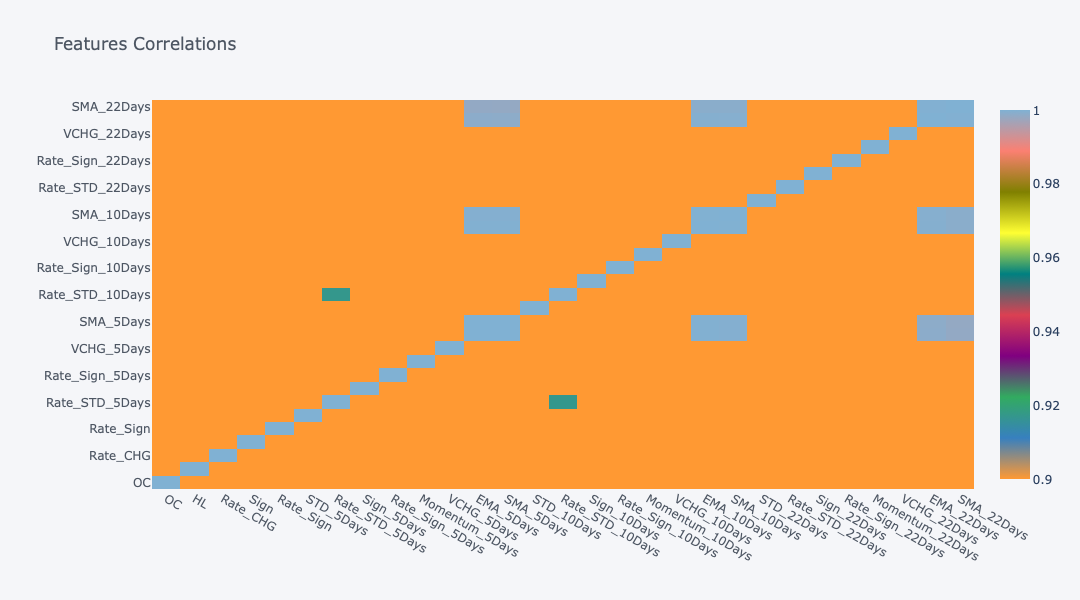

In [10]:
features_corr = features.corr()
features_corr.iplot(kind='heatmap', zmin=0.9, title='Features Correlations')

In [11]:
# remove the first feature that is correlated with any other feature
def correlated_features(data, threshold=0.9):
    col_corr = set()
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [12]:
# Total correlated features
drop_features = correlated_features(features)
# Remove highly correlated features
X = features.drop(drop_features, axis=1)
X.head()

OC         HL  Rate_CHG  Sign  Rate_Sign  STD_5Days  \
Date                                                                     
2014-02-04 -10.070068  31.550049  0.016523     1          1   0.016338   
2014-02-05   2.140137  50.470215  0.016254    -1          1   0.015709   
2014-02-06 -31.770020  37.100098  0.013038     1          1   0.013970   
2014-02-07 -39.579834  54.309815 -0.010043     1         -1   0.016567   
2014-02-10 -23.520019  25.060059  0.001121     1         -1   0.008409   

            Rate_STD_5Days  Sign_5Days  Rate_Sign_5Days  Momentum_5Days  ...  \
Date                                                                     ...   
2014-02-04        0.021078          -1               -1      -35.520020  ...   
2014-02-05        0.021015          -1               -1      -12.920166  ...   
2014-02-06        0.021743          -1                1      -34.809814  ...   
2014-02-07        0.021827           1                1       39.989990  ...   
2014-02-10        0.011588           1                1      141.610107  ...   

            Sign_10Days  Rate_Sign_10Days  Momentum_10Days  VCHG_10Days  \
Date                                                                      
2014-02-04           -1                -1      -147.500000     0.068499   
2014-02-05           -1                -1      -172.820069     0.069786   
2014-02-06           -1                -1      -116.159912    -0.113724   
2014-02-07            1                -1        20.429932    -0.174182   
2014-02-10            1                -1        73.090087    -0.244471   

            STD_22Days  Rate_STD_22Days  Sign_22Days  Rate_Sign_22Days  \
Date                                                                     
2014-02-04    0.010870         0.016103           -1                -1   
2014-02-05    0.010819         0.016679           -1                -1   
2014-02-06    0.011171         0.017061           -1                -1   
2014-02-07    0.011710         0.017087           -1                -1   
2014-02-10    0.011759         0.016345            1                -1   

            Momentum_22Days  VCHG_22Days  
Date                                      
2014-02-04       -93.370117     0.249905  
2014-02-05       -83.830078     0.300381  
2014-02-06       -29.359863    -0.152710  
2014-02-07         4.059814    -0.097607  
2014-02-10        14.570068    -0.227377  

[5 rows x 23 columns]

**Feature Scaling**

In [13]:
# Study which scaleing to use
X.describe()

OC           HL     Rate_CHG         Sign    Rate_Sign  \
count  2568.000000  2568.000000  2568.000000  2568.000000  2568.000000   
mean     -2.482719   131.437896     0.000148    -0.132399    -0.110592   
std     111.130010   113.187875     0.030650     0.991390     0.994059   
min    -909.229492    11.339843    -0.347009    -1.000000    -1.000000   
25%     -43.449951    46.384887    -0.013235    -1.000000    -1.000000   
50%      -5.819824    93.269775     0.000000    -1.000000    -1.000000   
75%      32.089722   187.950317     0.013288     1.000000     1.000000   
max     534.150390   923.659179     0.404797     1.000000     1.000000   

         STD_5Days  Rate_STD_5Days   Sign_5Days  Rate_Sign_5Days  \
count  2568.000000     2568.000000  2568.000000      2568.000000   
mean      0.011304        0.023095     0.119938        -0.049844   
std       0.008230        0.021169     0.992975         0.998952   
min       0.000867        0.001095    -1.000000        -1.000000   
25%       0.005850        0.012612    -1.000000        -1.000000   
50%       0.009378        0.018384     1.000000        -1.000000   
75%       0.014376        0.027986     1.000000         1.000000   
max       0.098657        0.302491     1.000000         1.000000   

       Momentum_5Days  ...  Sign_10Days  Rate_Sign_10Days  Momentum_10Days  \
count     2568.000000  ...  2568.000000       2568.000000      2568.000000   
mean        28.873832  ...     0.224299         -0.010903        57.130729   
std        287.005823  ...     0.974710          1.000135       397.336075   
min      -1568.150391  ...    -1.000000         -1.000000     -1901.989257   
25%        -74.667480  ...    -1.000000         -1.000000       -85.660156   
50%         35.960206  ...     1.000000         -1.000000        73.465088   
75%        146.547364  ...     1.000000          1.000000       240.829834   
max       1329.450196  ...     1.000000          1.000000      1940.760743   

       VCHG_10Days   STD_22Days  Rate_STD_22Days  Sign_22Days  \
count  2568.000000  2568.000000      2568.000000  2568.000000   
mean      0.031805     0.011988         0.024401     0.313863   
std       0.278289     0.006754         0.018799     0.949653   
min      -0.878242     0.003258         0.007499    -1.000000   
25%      -0.109332     0.007503         0.014846    -1.000000   
50%       0.003494     0.010299         0.020502     1.000000   
75%       0.128040     0.015061         0.027600     1.000000   
max       6.763190     0.058712         0.189677     1.000000   

       Rate_Sign_22Days  Momentum_22Days  VCHG_22Days  
count       2568.000000      2568.000000  2568.000000  
mean           0.003894       122.255543     0.039396  
std            1.000187       584.629348     0.294402  
min           -1.000000     -2724.440430    -0.869873  
25%           -1.000000      -100.422607    -0.117194  
50%            1.000000       131.104980    -0.006736  
75%            1.000000       393.262451     0.142503  
max            1.000000      1987.049804     5.987834  

[8 rows x 23 columns]

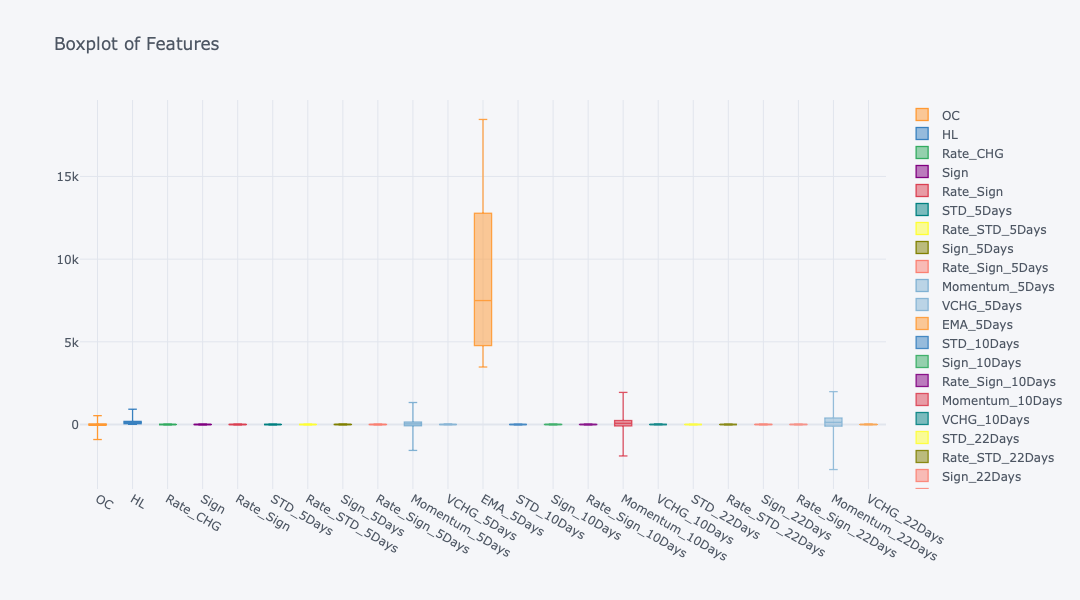

In [14]:
# Disply feature distribution
X.iplot(kind='box', title='Boxplot of Features')

We will use a standardised scale.

In [15]:
# Specify X
X = X.values

#### 3.2.5 Lable Specification

Label or the target variable is also known as the dependent variable. Here, the target variable is whether the underlying price will close up or down on the next trading day. If the tomorrow’s closing price is greater than the 0.995 of today’s closing price, then we will buy the underlying, else we will sell it.      
We assign a value of $+1$ for the buy signal and $0$ otherwise. The target can be described as :      
$$
  y_t =
    \begin{cases}
      1,  & \text{if $p_{t+1}>0.995*p_t$} \\
      0, & \text{if $p_{t+1}$ otherwise}
    \end{cases}
$$       
where, $p_t$ is the current closing price of the underlying and $p_{t+1}$ is the 1-day forward closing price of the underlying.

In [16]:
# Specify lable
y = np.where(df['Adj Close'].shift(-1)>0.995*df['Adj Close'], 1, 0)

In [17]:
# Check Class Imbalance
pd.Series(y).value_counts()

1    1923
0     645
Name: count, dtype: int64

#### 3.2.6 Model Building

We now build a base model with default parameters using **Pipelines**. Dataset needs to be scaled for the model to work properly and all the features should have a similar scale. The scaling can be accomplished by using the **StandardScaler**.

**Split Data**

In [18]:
# Split the Data into Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

**Fit Model** 

In [ ]:
# Define a Baseline Model
classifier = Pipeline([
        ("scaler", StandardScaler()),
        ("classifier", SVC(kernel='rbf', class_weight='balanced'))
    ])
classifier.fit(X_train, y_train)

**Predict Model**

In [20]:
# Get the Scores
acc_train = accuracy_score(y_train, classifier.fit(X_train, y_train).predict(X_train))
acc_test = accuracy_score(y_test, classifier.predict(X_test))
print(f'Baseline Model -- Train Accuracy: {acc_train:0.4}, Test Accuracy:{acc_test:0.4}')

Baseline Model -- Train Accuracy: 0.7118, Test Accuracy:0.4455


The train accuracy outperforms the test accuracy, which signifies overfitting.

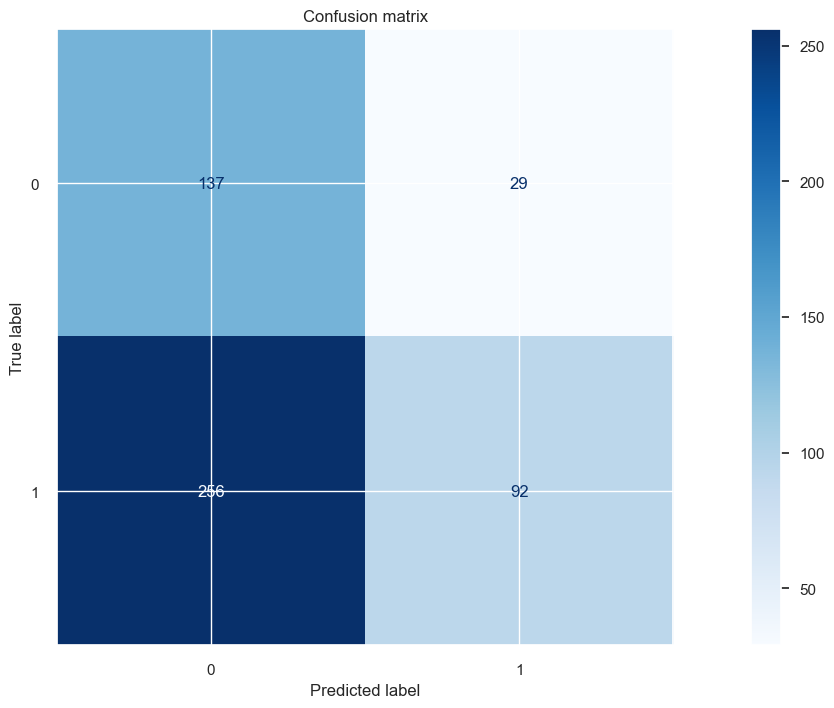

In [21]:
# Display confussion matrix
disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        # display_labels=model.classes_,
        cmap=plt.cm.Blues
    )
plt.title('Confusion matrix')
plt.show()

Here, we can see that classifier did not perform as well as expected. Of the 348 days that moves up, and of the 166 days that down, only 26% (92 days) and 83% (137 days) were correctly classified in their respective categories.

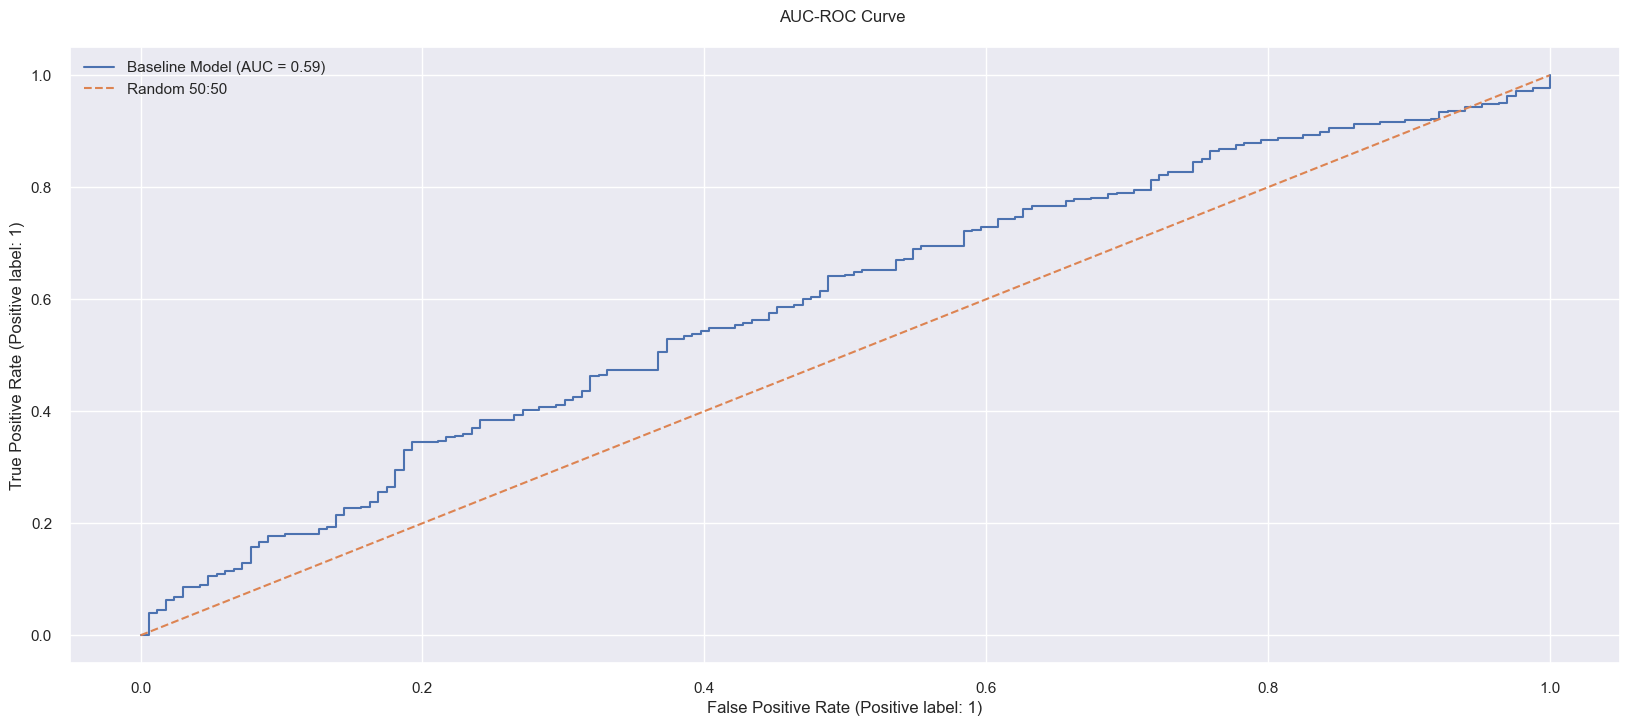

In [22]:
# Display ROCCurve
disp = RocCurveDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        name='Baseline Model')
plt.title("AUC-ROC Curve \n")
plt.plot([0,1],[0,1],linestyle="--", label='Random 50:50')
plt.legend()
plt.show()

Receive Operating Characteristic curve is a plot of the false positive rate versus the true positive rate. The goodness of the model in predicting the positive class is weak when the actual outcome is positive. AUC only hacve 0.59.

In [23]:
# Classification Report
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.35      0.83      0.49       166
           1       0.76      0.26      0.39       348

    accuracy                           0.45       514
   macro avg       0.55      0.54      0.44       514
weighted avg       0.63      0.45      0.42       514



<b>Macro Average</b> Average of precision (or recall or f1-score) of different classes.       
<b>Weighted Average</b> Actual Class 1 instance $*$ precision (or recall or f1-score) of Class 1 + Actual Class 2 instance $*$ (or recall or f1-score) of Class 2.

The quality of predictions from a classification algorithm is not good, did not perform as well as expected to up trends.

#### 3.2.7 Hyperparameter Tuning             
Hyper-parameters are parameters that are not directly learnt within estimators. In scikit-learn they are passed as arguments to the constructor of the estimator classes. It is possible and recommended to search the hyper-parameter space for the best cross validation score. Any parameter provided when constructing an estimator may be optimized in this manner.         
**Cross-validation of Time Series**           
Time series data are sequential in nature and are characterised by the correlation between observations.Classical cross-validation techniques such as KFold assume the samples are independent and identically distributed, and would result in poor estimates when applied on time series data.             
To preserve the order and have training set occur prior to the test set, we use <b>Forward Chaining</b> method in which the model is initially trained and tested with the same windows size. And, for each subsequent fold, the training window increases in size, encompassing both the previous training data and test data. The new test window once again follows the training window but stays the same length.              
We will tune the hyperparameters to select the C and gamma by <b>TimeSeriesSplit</b> from scikitlearn.This is a forward chaining cross-validation method and is a variation from the KFold. In the kth split, it returns first k folds as train set and the (k+1)th fold as test set. Unlike standard cross-validation methods, successive training sets are supersets of those that come before them.

To improve model performance, we will use both cross validation and GridSearchCV() to find the optimal hyperparameters within model. More specifically, we're looking to identify the best values for regularization parameter (C) and gamma. And using optuna library.

In [24]:
# Define optimization function
def optimization(trial, x, y):
    param_grid = {'C': [trial.suggest_float('C', 0.7, 0.9, log=True)],
                  'gamma': [trial.suggest_float('gamma', 0.15, 0.3, log=True)]}
    model = SVC(kernel='rbf')   
    tscv = TimeSeriesSplit(n_splits=5, gap=1)
    rs = GridSearchCV(model, param_grid,scoring='accuracy', cv=tscv)
    score = cross_val_score(rs, X=x, y=y, cv=tscv)
    return score.mean()

In [ ]:
study = optuna.create_study(study_name='hyper-parameter_SVC', direction='maximize')

In [ ]:
# Specify optimization function
X = StandardScaler().fit(X).transform(X)
optmz_fun = partial(optimization, x=X, y=y)
study.optimize(optmz_fun, n_trials=50)

In [27]:
# Get the Best Params
print(f'Best Params: {study.best_params}, Best Value: {study.best_value}')

Best Params: {'C': 0.7042950237507435, 'gamma': 0.15309517589753835}, Best Value: 0.7439252336448599


**Visualize Optimization**

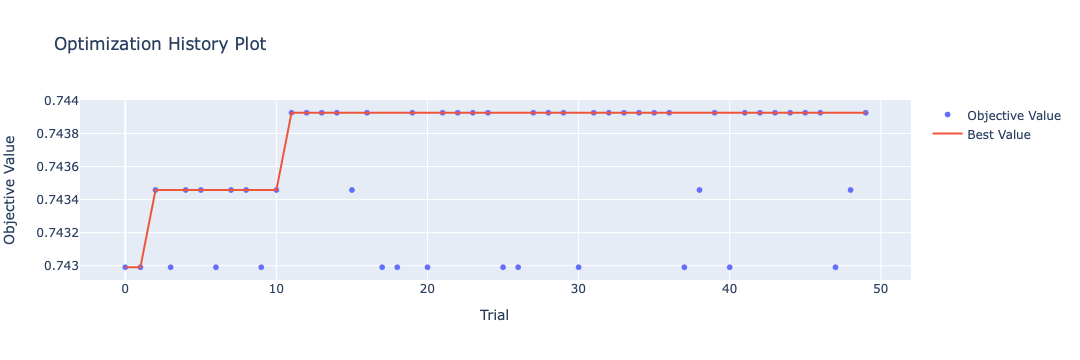

In [28]:
# plot Optimization History
optuna.visualization.plot_optimization_history(study)

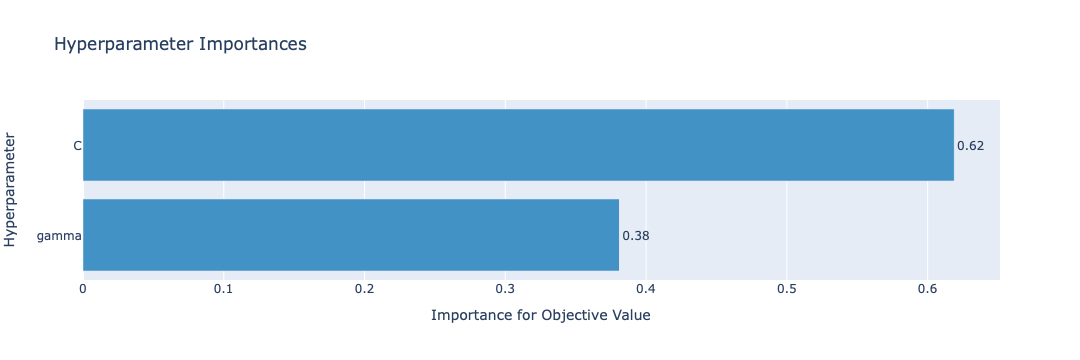

In [29]:
# Plot Param Importances
optuna.visualization.plot_param_importances(study)

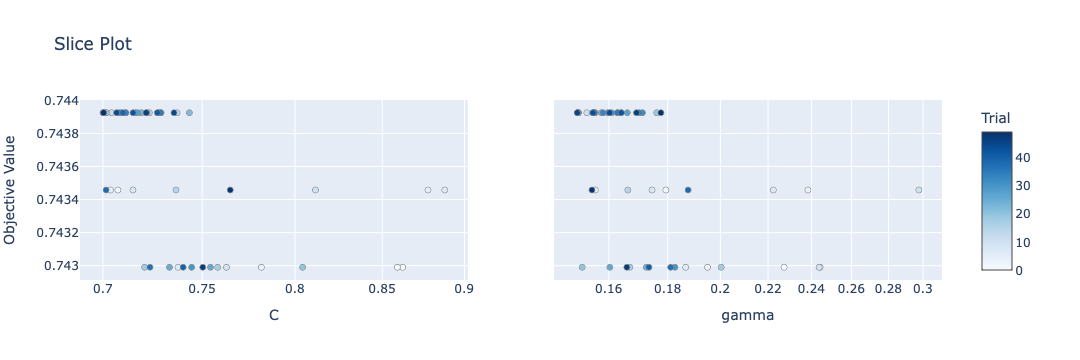

In [30]:
# plot accuracies for each HP trail
optuna.visualization.plot_slice(study, params=['gamma', 'C'])

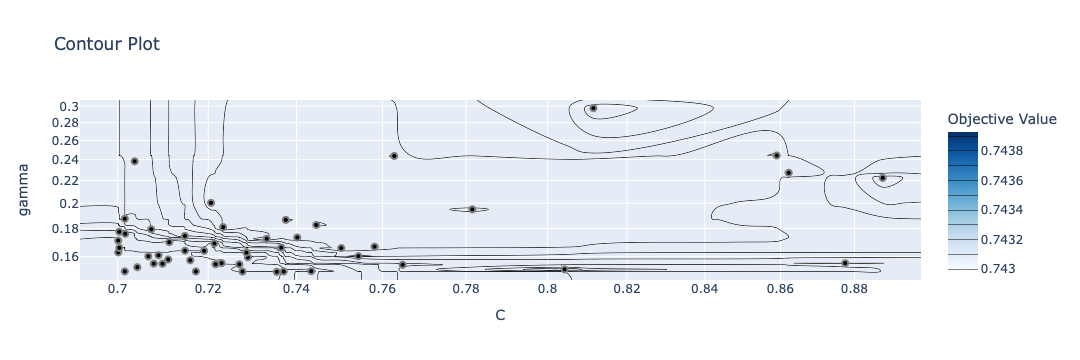

In [31]:
# plot the surface
optuna.visualization.plot_contour(study)

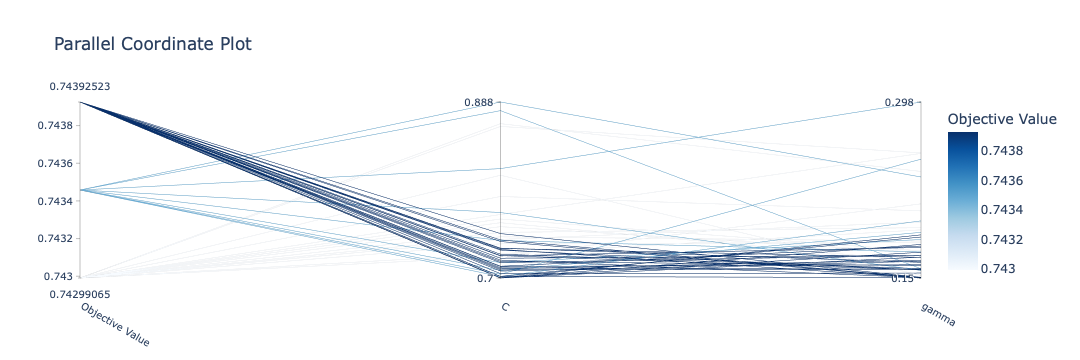

In [32]:
# plot parallel coordinates
optuna.visualization.plot_parallel_coordinate(study)

The parameter grid is centered on the optimal value, with Parameter C holding greater significance. We see that gamma and C are tightly coupled,  as illustrated in Figure plot_contour and plot_parallel_coordinate.

#### 3.2.7 Tuned Model

In [ ]:
# Define a Baseline Model
classifier = Pipeline([
        ("scaler", StandardScaler()),
        ("classifier", SVC(kernel='rbf' , C=study.best_params['C'], gamma=study.best_params['gamma'], class_weight='balanced'))
    ])
classifier.fit(X_train, y_train)

**Predict Model**

In [34]:
# Get the Scores
acc_train = accuracy_score(y_train, classifier.fit(X_train, y_train).predict(X_train))
acc_test = accuracy_score(y_test, classifier.predict(X_test))
print(f'Baseline Model -- Train Accuracy: {acc_train:0.4}, Test Accuracy:{acc_test:0.4}')

Baseline Model -- Train Accuracy: 0.8574, Test Accuracy:0.5097


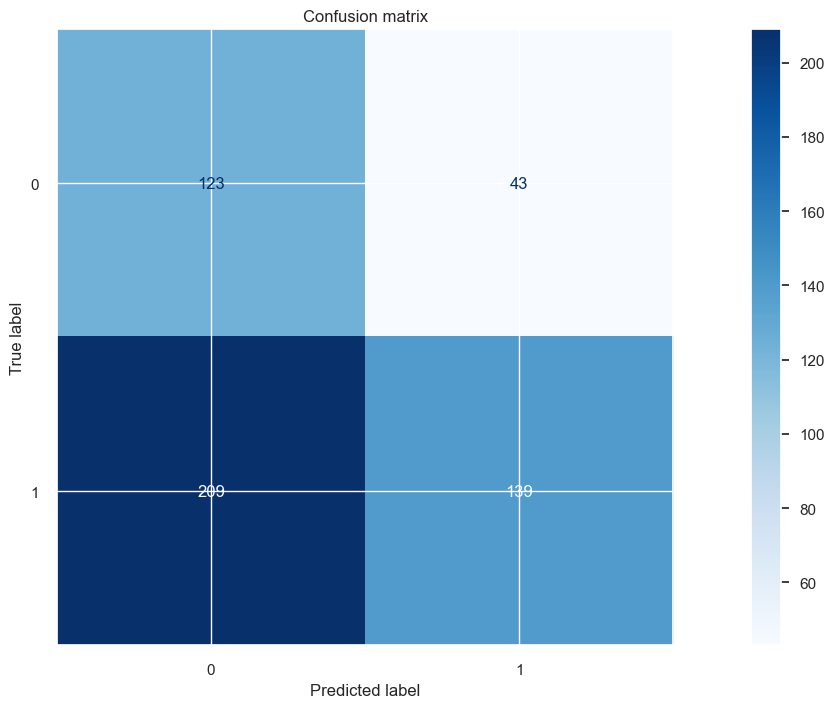

In [35]:
# Display confussion matrix
disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        # display_labels=model.classes_,
        cmap=plt.cm.Blues
    )
plt.title('Confusion matrix')
plt.show()

The new confusion matrix demonstrates that we've seen minor improvements to the classification that moves up. Now, the model correctly classifies 40% of the data correctly versus 70%. Overall, we've improved the accuracy score of the model by less than 10 percentage point.

However, the train accuracy still outperforms the test accuracy, overfitting exists.

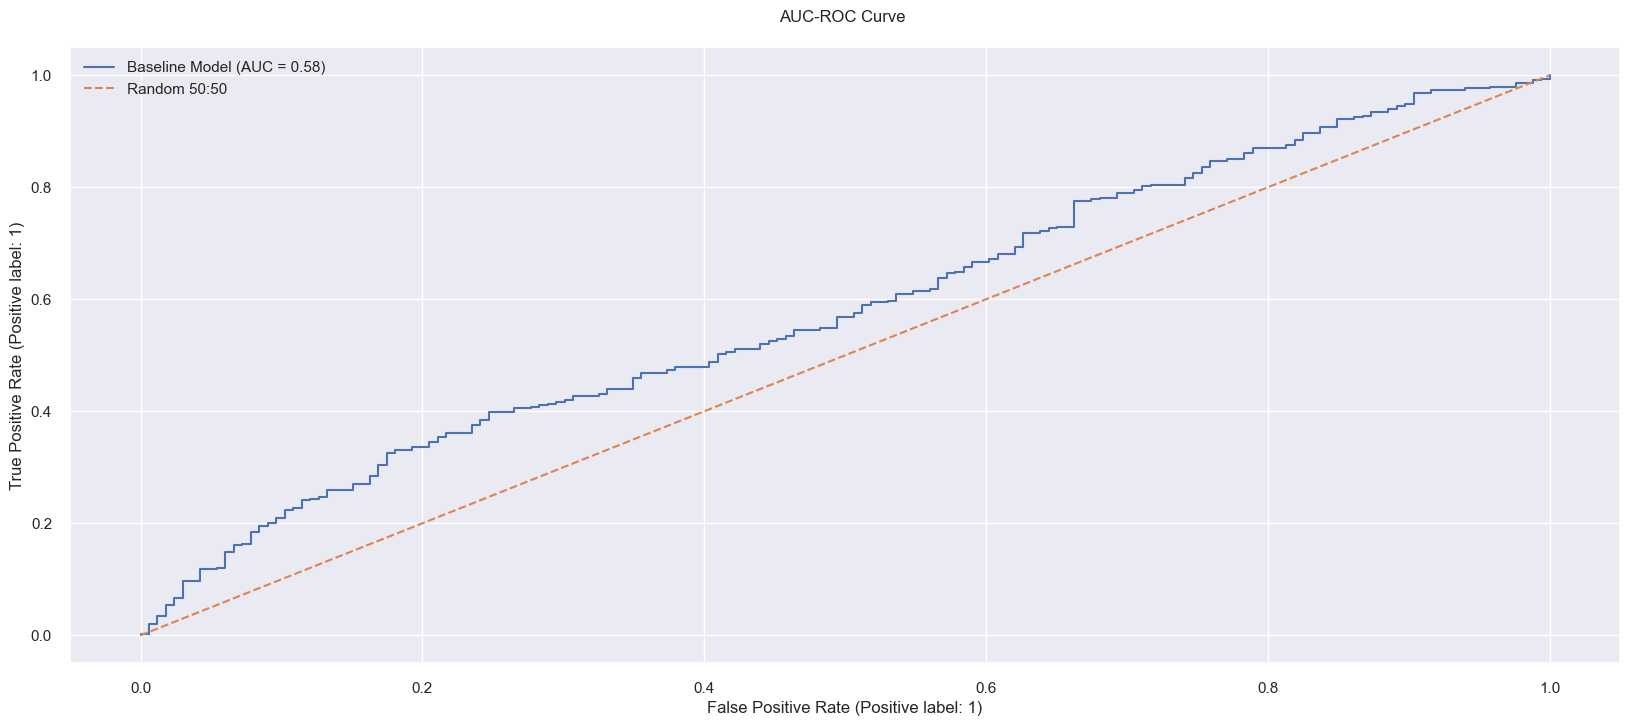

In [36]:
# Display ROCCurve
disp = RocCurveDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        name='Baseline Model')
plt.title("AUC-ROC Curve \n")
plt.plot([0,1],[0,1],linestyle="--", label='Random 50:50')
plt.legend()
plt.show()

AUC=0.58<0.59, predictor perform weakly.

In [37]:
# Classification Report
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.37      0.74      0.49       166
           1       0.76      0.40      0.52       348

    accuracy                           0.51       514
   macro avg       0.57      0.57      0.51       514
weighted avg       0.64      0.51      0.51       514



The overall prediction accuracy for upward trends has been enhanced. The tuning has been improved compared to earlier versions.

### Conclusion

For binary classification problems, feature selection and label specification are crucial. Different features directly impact the final results, and label setting is an issue that requires focused study. For the adjustment of RBF kernel parameters, the effective setting of parameter ranges determines the final accuracy of the model. The overall performance of the model is suboptimal and needs further improvement to enhance its practicality.

# Reference
- [1] MACHINE LEARNING - AN APPLIED MATHEMATICS INTRODUCTION, Paul Wilmott, Panda Ohana Publishing.
- [2] Probabilistic Machine Learning, Kevin P. Murphy, The MIT Press Cambridge, Massachusetts London, England
- [3] MATHEMATICS for MACHINE LEARNING, Marc Peter Deisenroth, A. Aldo Faisal, and Cheng Soon Ong, Published by Cambridge University Press.
- [4] Foundations of Machine Learning - second edition, Mehryar Mohri, Afshin Rostamizadeh, and Ameet Talwalkar, The MIT Press Cambridge, Massachusetts London, England.
- [5] CQF Course M4 L3 - Maths Toolbox for Machine Learning
- [6] CQF Course M4 L4 - Supervised Learning I
- [7] CQF Course M4 L5 - Supervised Learning II
- [8] CQF Python Labs - Introduction to Machine Learning using Scikit-learn
- [9] CQF Python Labs - Trend prediction using Logistic Regression
- [10] CQF Python Labs - Gradient Boosting for Price Prediction
- [11] [TimeSeriesSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html)      
- [12] [Cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html)       
- [13] [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)      
- [14] [Hyperparameters Tuning](https://scikit-learn.org/stable/modules/grid_search.html#grid-search)       
- [15] [Support Vector Machines](https://scikit-learn.org/stable/modules/svm.html)   
- [16] [Classifying data using the SVM algorithm using Python](https://developer.ibm.com/tutorials/awb-classifying-data-svm-algorithm-python/#step-8-classify-accounts-and-evaluate-the-model)